# NOTEBOOK Project 1

## Sanogo Ibrahim, Joel Brou-Boni
 

## I- Basic Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import emcee as emcee
import corner
import nestle
import pandas as pd
np.random.seed(123)
data= np.loadtxt(f'Project1.dat', unpack = 'True')
##################################""New Datas #####################################
mu = 0 
dy=1 #StandDar Deviation 
M=1000 #Size
c=0.0001 #Quality 
x= np.linspace(0,1/np.pi,M)
GenData =np.square(((1/2)+np.tan((np.pi/2)*x)))
d=GenData*(1+c*stats.norm.rvs(mu,dy,size=M))
sd = c*d

<ErrorbarContainer object of 3 artists>

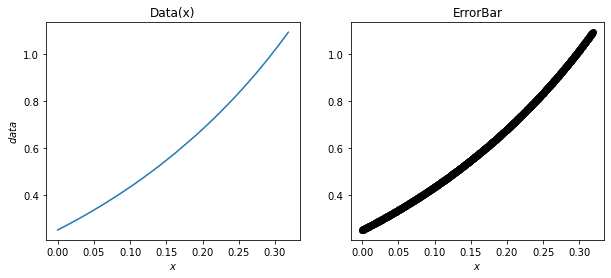

In [2]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
ax[0].plot(x,d)
ax[0].set_xlabel(r'$x$')
ax[1].set_xlabel(r'$x$')
ax[0].set_ylabel(r'$data$')

ax[0].set_title('Data(x)')
ax[1].set_title('ErrorBar')

ax[1].errorbar(x,d,sd,fmt="ok")

In [3]:
def log_prior(theta):
    if np.all(np.abs(theta) < 100):
        return 0 # log(1)
    else:
        return -np.inf  # log(0)

def log_prior2(theta): #For the extra tasks 
    if np.all(np.abs(theta) < 1000000):
        return 0 # log(1)
    else:
        return -np.inf  # log(0)

def log_prior_gaussian2(theta):
    a_bar=5
    thetaT=theta.transpose()
    val = -0.5 * (np.dot( theta.T,theta) )/ a_bar**2 
    return val


def LikelyHood (x,d,sd,k,theta): 
    somme = 0 
    ki = 0
    gth=theta[0]*np.ones(len(d))
    i=0
    for i in range(1,k,1): 
        gth += theta[i]*x**i
    return np.sum(-np.log(np.sqrt(2*np.pi)*sd) - np.square((d-gth)/ sd)/2)

def ki2 (x,d,sd,k,a): 
    somme = 0 
    ki = 0
    gth=a[0]*np.ones(len(d))
    i=0
    for i in range(1,k,1): 
        gth += a[i]*x**i
    return np.sum(np.square((d-gth)/ sd))

def log_flat_posterior_Basic(theta,x,d,sd):
    return LikelyHood (x,d,sd,4,theta)+ log_prior2(theta)
def log_flat_posterior_Extra(theta,x,d,sd):
    return LikelyHood (x,d,sd,4,theta)+ log_prior(theta)
def log_Gaussian_posterior_(theta,x,d,sd):
    return LikelyHood (x,d,sd,4,theta) + log_prior_gaussian2(theta)


def log_flat_posterior_Extra(theta,x,d,sd,ndim):
    return LikelyHood(x,d,sd,ndim,theta)+ log_prior2(theta)
def log_Gaussian_posterior_Extra(theta,x,d,sd,ndim):
    return LikelyHood(x,d,sd,ndim,theta) + log_prior_gaussian2(theta)


In [4]:
ndim = 4
nwalkers = 100 
nsteps = 1000
theta = np.random.rand(nwalkers,ndim)
Test=ki2 (x,d,sd,4,theta[0])


sampler_Flat = emcee.EnsembleSampler(nwalkers, ndim, log_flat_posterior_Basic, args=(x,d,sd))
sampler_Flat.run_mcmc(theta, nsteps,progress=True)
samples_Flat = sampler_Flat.get_chain(discard=500, flat=True)

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 81.55it/s]


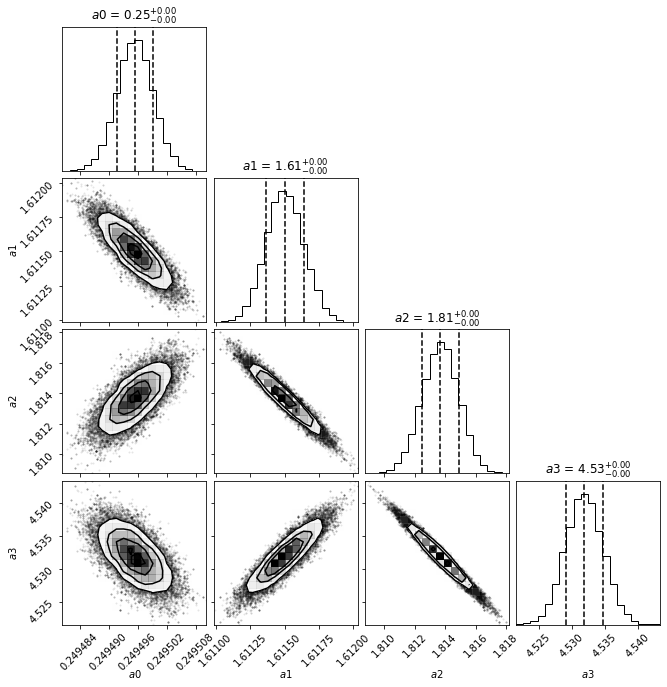

In [5]:
print("Flat prior")
figure=corner.corner(samples_Flat,labels=[r'$a0$',r'$a1$',r'$a2$',r'$a3$',r'$a1$',r'$a2$',r'$a3$'],quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:12<00:00, 83.22it/s]


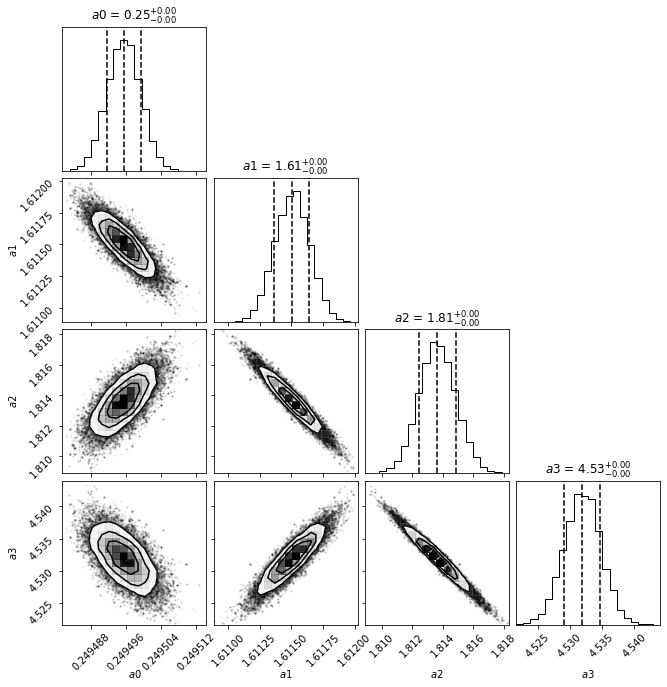

In [6]:
sampler_Gauss = emcee.EnsembleSampler(nwalkers, ndim, log_Gaussian_posterior_, args=(x,d,sd))
sampler_Gauss.run_mcmc(theta, nsteps,progress=True)
samples_Gauss = sampler_Gauss.get_chain(discard=500, flat=True)
print("Gauss prior")
figure=corner.corner(samples_Gauss,labels=[r'$a0$',r'$a1$',r'$a2$',r'$a3$',r'$a3$',r'$a1$',r'$a2$',r'$a3$'],quantiles=[0.16, 0.5, 0.84],
                       show_titles=True, title_kwargs={"fontsize": 12})

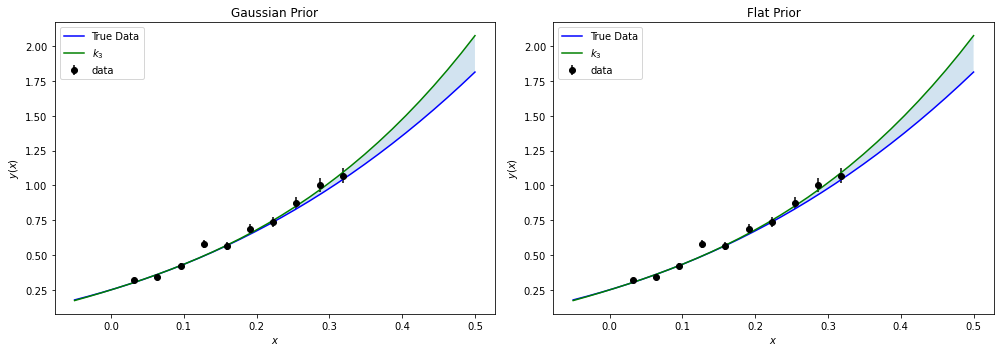

In [7]:
fig1,ax1 = plt.subplots(1,2,figsize=(14,5))
ax1[0].set_xlabel(r'$x$')
ax1[0].set_ylabel(r'$y(x)$')

ax1[1].set_xlabel(r'$x$')
ax1[1].set_ylabel(r'$y(x)$')

ax1[0].set_title('Gaussian Prior')
ax1[1].set_title('Flat Prior')

lin = np.linspace(-0.05,0.5,30)

True_Data = 0.25+1.57*lin+2.47*lin**2+1.29*lin**3
ax1[0].plot(lin,True_Data,'-',color='blue',label='True Data')
ax1[1].plot(lin,True_Data,'-',color='blue',label='True Data')

ais_G =np.percentile(samples_Gauss,[16,50,84],axis=0)
ais_F =np.percentile(samples_Flat,[16,50,84],axis=0)
k_3_G = np.zeros((len(lin),3))
k_3_F = np.zeros((len(lin),3))

ax1[0].errorbar(data[0],data[1],data[2],fmt="ok",label='data')
ax1[1].errorbar(data[0],data[1],data[2],fmt="ok",label='data')

for i in range(3): 
    k_3_G[:,i]= ais_G[i,0]+ais_G[i,1]*lin+ais_G[i,2]*lin**2+ais_G[i,3]*lin**3
    k_3_F[:,i]= ais_F[i,0]+ais_F[i,1]*lin+ais_F[i,2]*lin**2+ais_F[i,3]*lin**3

ax1[0].fill_between(lin,True_Data, k_3_G[:,1],alpha=0.2)
ax1[1].fill_between(lin,True_Data, k_3_F[:,1],alpha=0.2)

ax1[0].plot(lin,k_3_G[:,1],'g-',label='$k_3$')
ax1[1].plot(lin,k_3_F[:,1],'g-',label='$k_3$')

fig1.tight_layout()
ax1[0].legend(loc='best')
ax1[1].legend(loc='best')

test=np.quantile(samples_Gauss, 0.5, axis=0)

## II- Extra Tasks 
### Part 1

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:52<00:00, 18.92it/s]


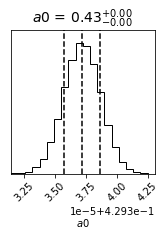

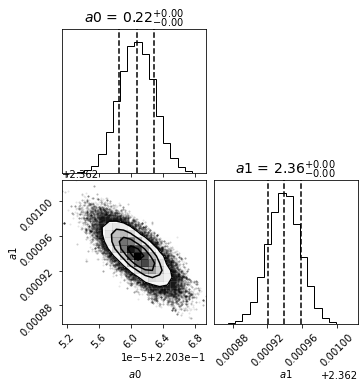

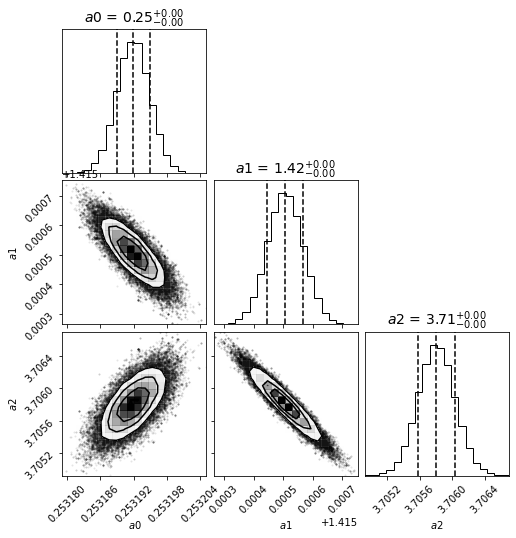

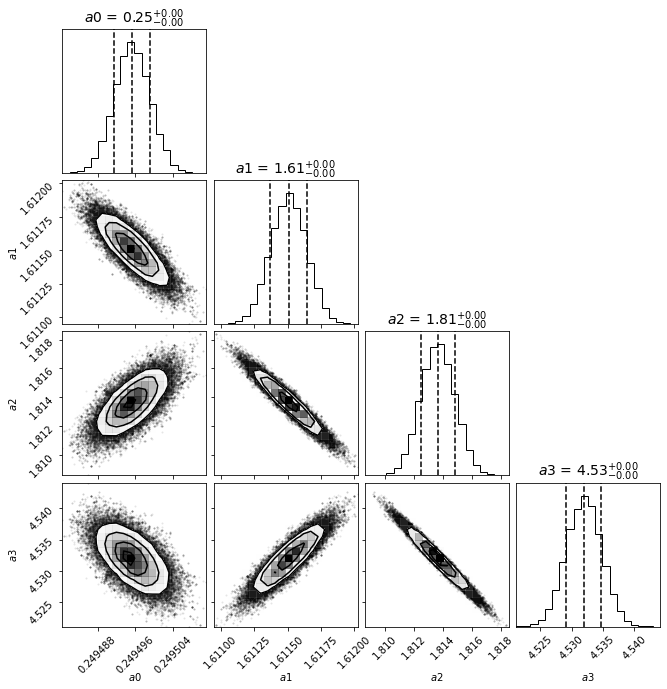

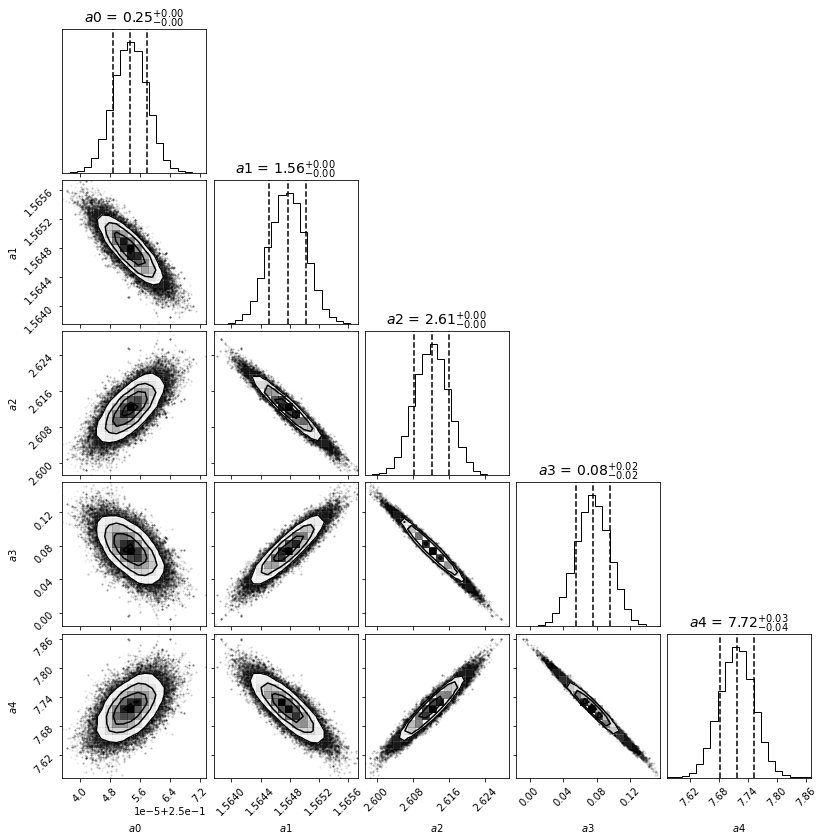

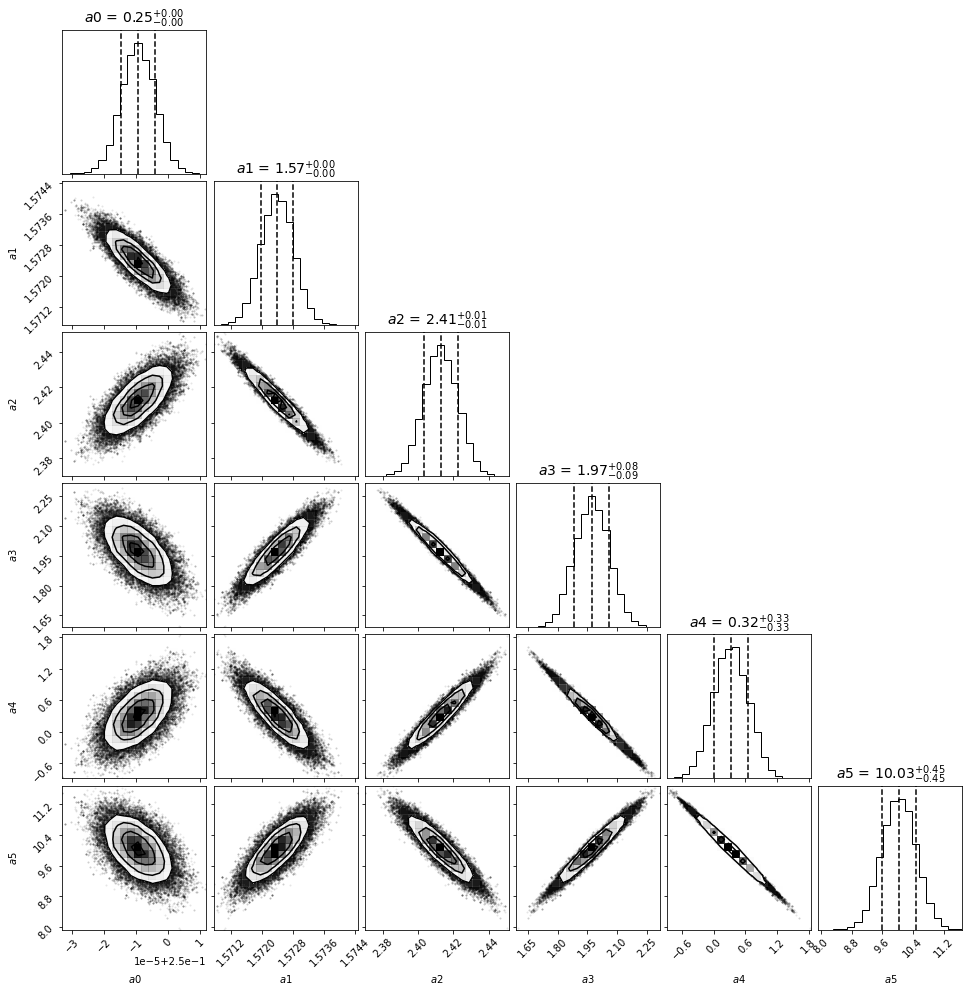

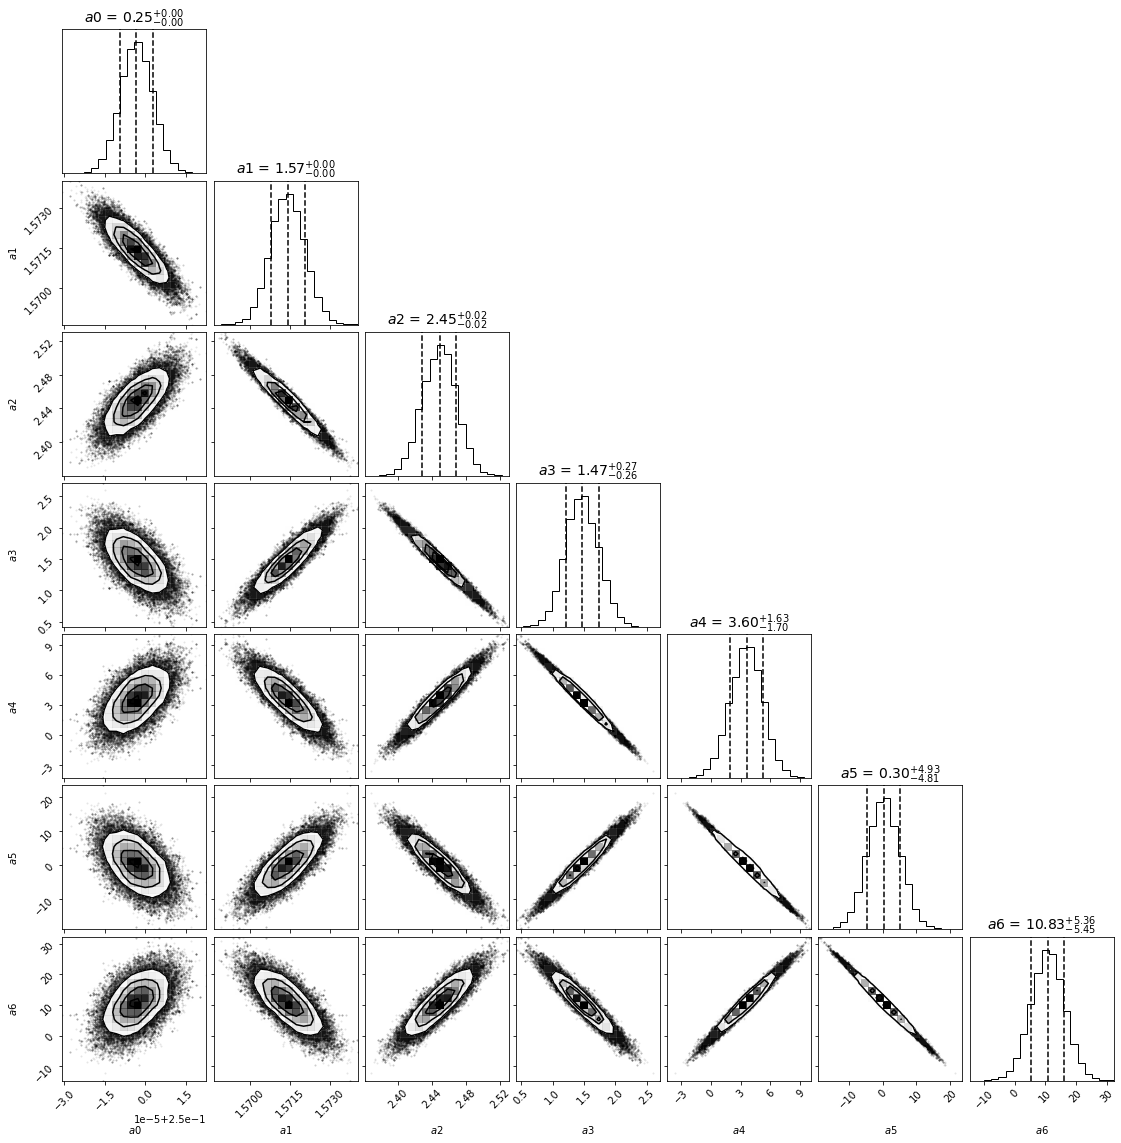

In [8]:
ndimax=6
ndim=0
nwalkers = 200
nsteps = 10000
sampleStock=[]
print("Flat prior")

for ndim in range (1,ndimax+2):
    theta_Flat = np.random.rand(nwalkers,ndim)
    sampler_Flat = emcee.EnsembleSampler(nwalkers, ndim, log_flat_posterior_Extra, args=(x,d,sd,ndim))
    sampler_Flat.run_mcmc(theta_Flat, nsteps,progress=True)
    samples_Flat = sampler_Flat.get_chain(discard=500, flat=True)
    figure=corner.corner(samples_Flat,labels=[r'$a0$',r'$a1$',r'$a2$',r'$a3$',r'$a4$',r'$a5$',r'$a6$'],quantiles=[0.16, 0.5, 0.84],
                           show_titles=True, title_kwargs={"fontsize": 14})
    sampleStock.append(np.percentile(samples_Flat,[16,50,84],axis=0))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:05<00:00, 15.27it/s]


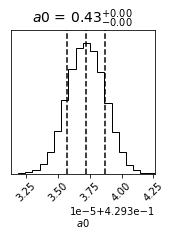

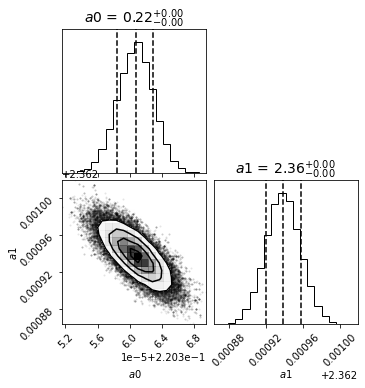

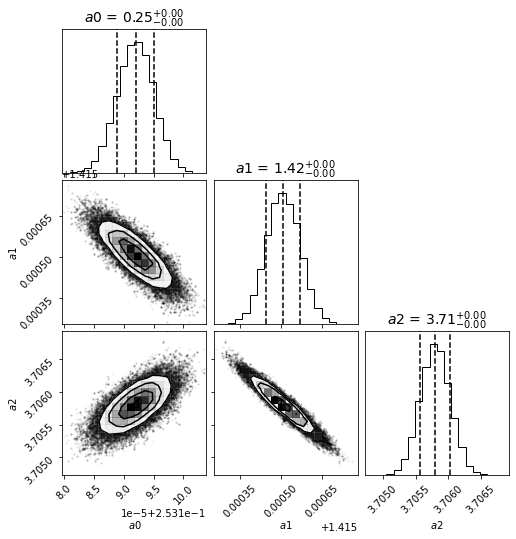

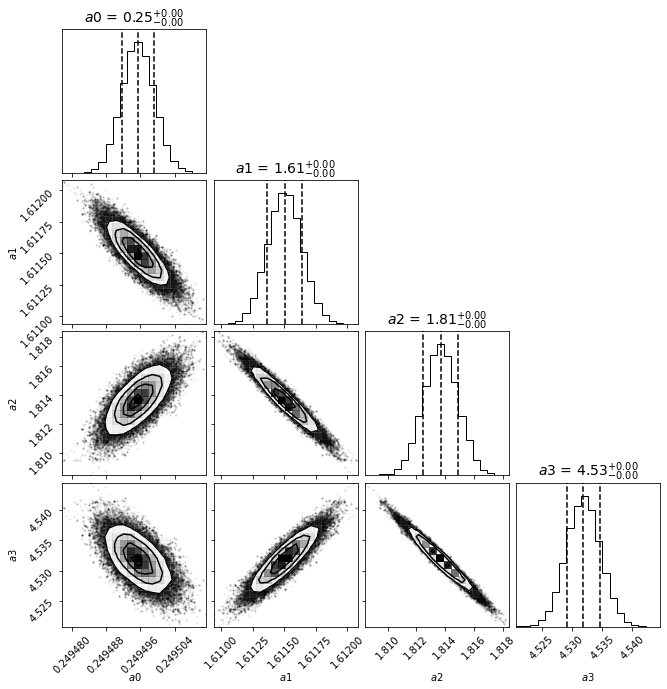

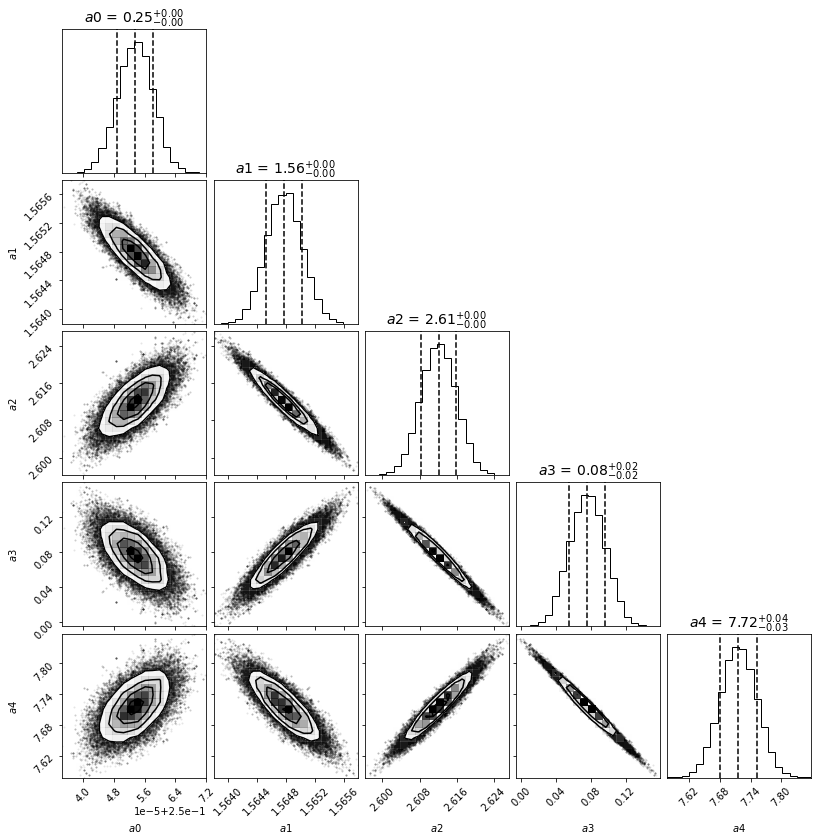

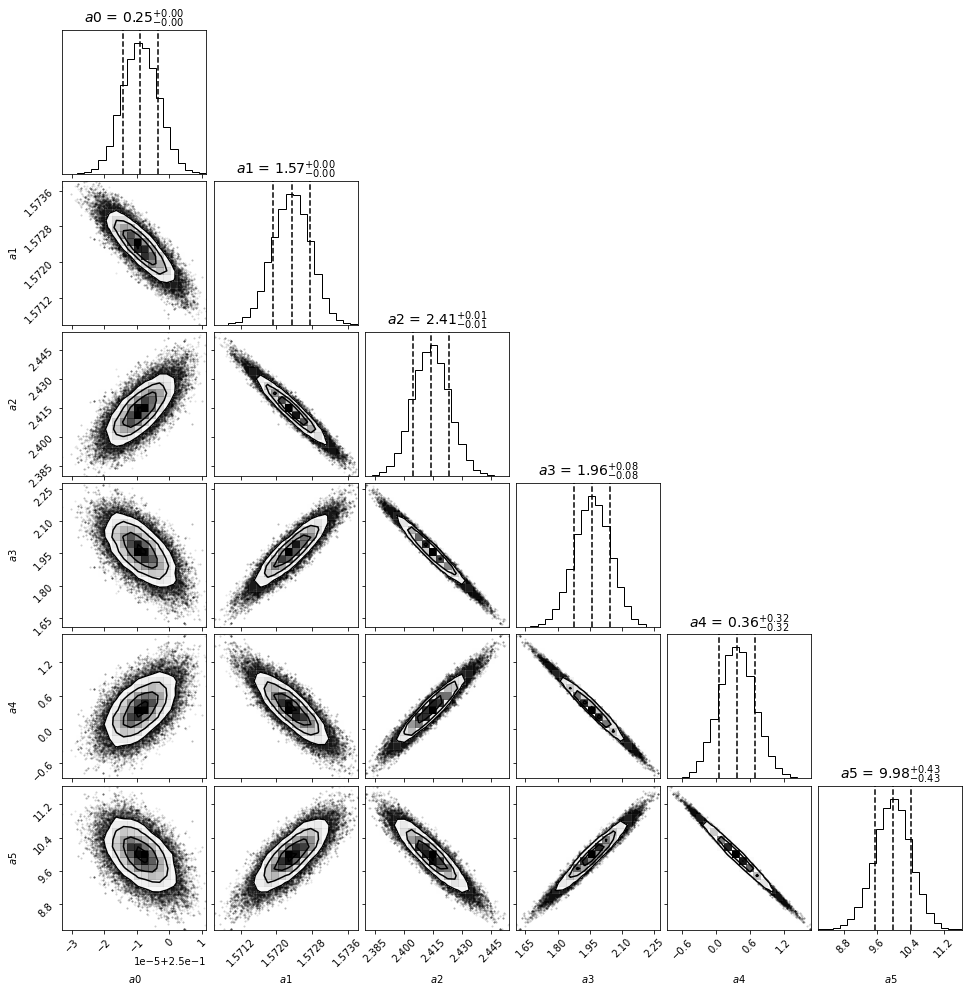

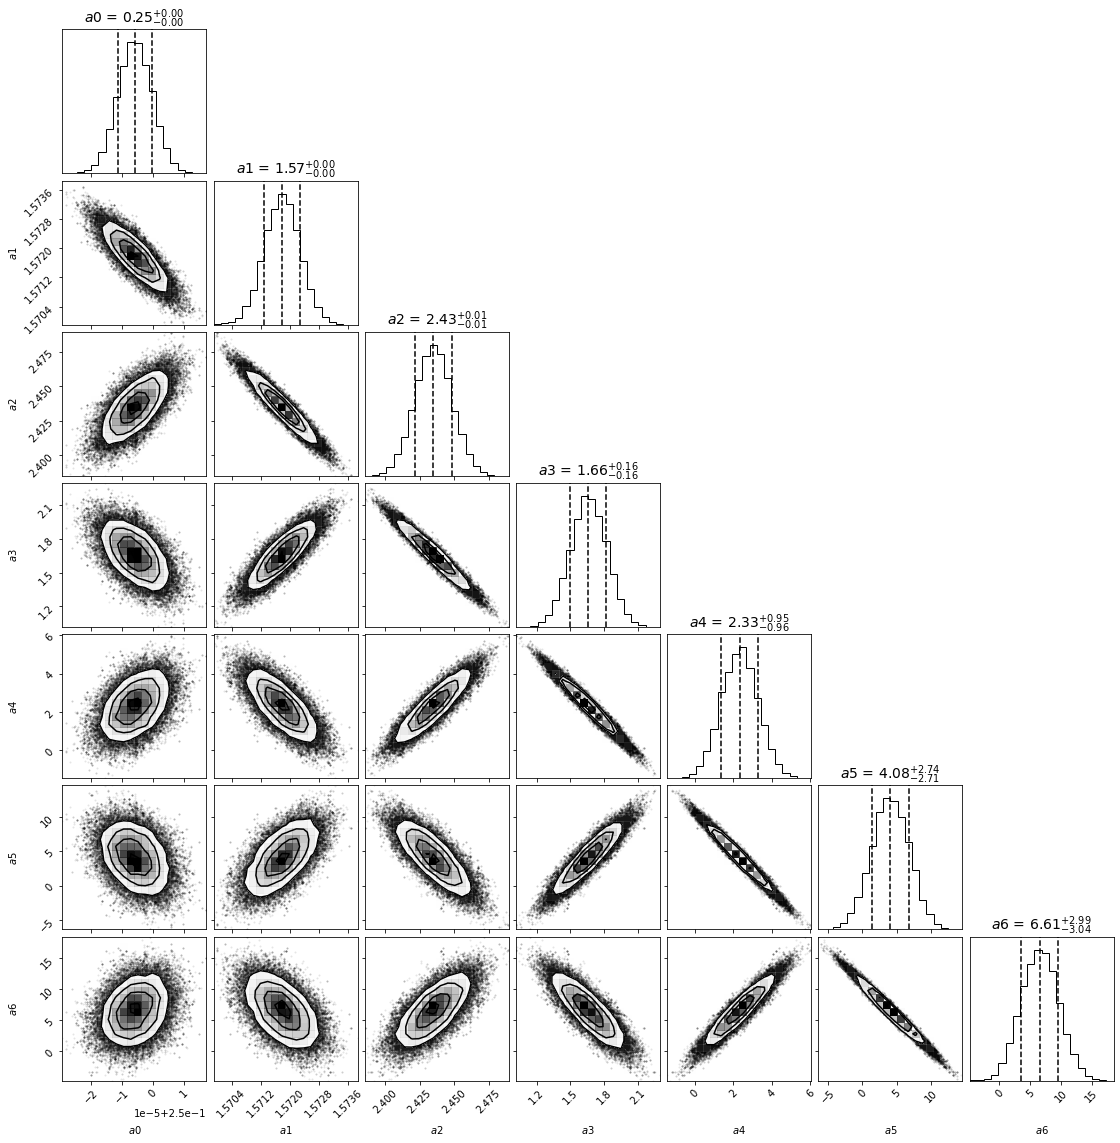

In [9]:
nstepsG = 1000
sampleStockG=[]
print("Gauss prior")
for ndim in range (1,ndimax+2):
    theta_Gauss = np.random.rand(nwalkers,ndim)
    sampler_Gauss = emcee.EnsembleSampler(nwalkers, ndim, log_Gaussian_posterior_Extra, args=(x,d,sd,ndim))
    sampler_Gauss.run_mcmc(theta_Gauss, nstepsG,progress=True)
    samples_Gauss = sampler_Gauss.get_chain(discard=500, flat=True)
    figure=corner.corner(samples_Gauss,labels=[r'$a0$',r'$a1$',r'$a2$',r'$a3$',r'$a4$',r'$a5$',r'$a6$'],quantiles=[0.16, 0.5, 0.84],
                           show_titles=True, title_kwargs={"fontsize": 14})
    sampleStockG.append(np.percentile(samples_Gauss,[16,50,84],axis=0))

In [10]:
#G= Gauss , F = FLtat
minValue=[]
maxValue=[]
ais = []
minValueInt=[]
maxValueInt=[]
ValMax=[]
ValMin=[]

minValueF=[]
maxValueF=[]
aisF = []
minValueIntF=[]
maxValueIntF=[]
ValMaxF=[]
ValMinF=[]

for i in range (ndimax+1):
    
    minValue.append(sampleStockG[i][0])
    maxValue.append(sampleStockG[i][2])
    ais.append(sampleStockG[i][1])
    #maxValue.append(sampleStockG[i][i+1])
for i in range (ndimax+1):
    ValMax.append(-(np.round(ais[i]-minValue[i],2)))
    ValMin.append(-(np.round(ais[i]-maxValue[i],2)))
    

for i in range (ndimax+1):
    
    minValueF.append(sampleStock[i][0])
    maxValueF.append(sampleStock[i][2])
    aisF.append(sampleStock[i][1])
#print("Ais", len(maxValueF), "AisG",len(aisF))
    #maxValue.append(sampleStockG[i][i+1])
for i in range (ndimax+1):
    ValMaxF.append(-(np.round(aisF[i]-minValueF[i],2)))
    ValMinF.append(-(np.round(aisF[i]-maxValueF[i],2)))
    
print(ValMin)



[array([0.]), array([0., 0.]), array([0., 0., 0.]), array([0., 0., 0., 0.]), array([0.  , 0.  , 0.  , 0.02, 0.04]), array([0.  , 0.  , 0.01, 0.08, 0.32, 0.43]), array([0.  , 0.  , 0.01, 0.16, 0.95, 2.74, 2.99])]


In [11]:

######################## GAUSSIAN #######################
dataFrameG=[]
kMat=[]
kmax=[]
khi2Dof=[]
a0G=[]
a1G=[]
a2G=[]
MinValuea0=[]
MinValuea1=[]
MinValuea2=[]

MaxValuea0=[]
MaxValuea1=[]
MaxValuea2=[]
########################## FLAT ##########################
dataFrameF=[]
a0F=[]
a1F=[]
a2F=[]
khi2DofF=[]
MinValuea0F=[]
MinValuea1F=[]
MinValuea2F=[]

MaxValuea0F=[]
MaxValuea1F=[]
MaxValuea2F=[]



######################## Parameters Extraction #######################
for i in range(7):
    kmax.append(i)
    if (i<=2):
        kMat.append(i)
    else:
        kMat.append(2)
        
for i in range (1,ndimax+2):
    u=ki2 (x,d,sd,i,ais[i-1])
    u=u/(10-i)
    khi2DofF.append(u)

for i in range(7):
    a0F.append(aisF[i][0])
    a0G.append(ais[i][0])
    MinValuea0F.append((ValMinF[i][0]))
    MaxValuea0F.append((ValMaxF[i][0]))
    MinValuea0.append((minValue[i][0]))
    MaxValuea0.append((ValMin[i][0]))
    if(i>=1):
        a1F.append(aisF[i][1])  
        a1G.append(ais[i][1])
        MinValuea1F.append(ValMinF[i][1])
        MaxValuea1F.append(ValMaxF[i][1])
        MinValuea1.append(ValMin[i][1])
        MaxValuea1.append(ValMax[i][1])
    else:
         a1F.append(np.nan)  
         a1G.append(np.nan) 
         MinValuea1F.append(np.nan) 
         MaxValuea1F.append(np.nan) 
         MinValuea1.append(np.nan) 
         MaxValuea1.append(np.nan) 
        
for i in range(7):
    
    if(i>=2):
        a2F.append(aisF[i][2])  
        a2G.append(ais[i][2])
        MinValuea2F.append(ValMinF[i][2])
        MaxValuea2F.append(ValMaxF[i][2])
        MinValuea2.append(ValMin[i][2])
        MaxValuea2.append(ValMax[i][2])
    else:
        a2F.append(np.nan) 
        a2G.append(np.nan) 
        MinValuea2F.append(np.nan) 
        MaxValuea2F.append(np.nan) 
        MinValuea2.append(np.nan) 
        MaxValuea2.append(np.nan) 
        

############################ DATA FRAME ###############################
dataFrameG.append(kMat)
dataFrameG.append(kmax)

Test2=np.round(khi2DofF,2)
Test3=Test2.tolist()
dataFrameG.append(Test3)

dataFrameG.append((np.round(a0F,2)))
dataFrameG.append((np.round(a1F,2)))
dataFrameG.append((np.round(a2F,2)))


dataFrameG.append((np.round(a0G,2)))
dataFrameG.append((np.round(a1G,2)))
dataFrameG.append((np.round(a2G,2)))

dataFramemini=[]
#MinValuea1F,MinValuea2F,MinValuea0,MinValuea1,,MinValuea2

dataFramemini.append(MinValuea0F)
dataFramemini.append(MinValuea1F)
dataFramemini.append(MinValuea2F)
dataFramemini.append(np.round(MinValuea0,2))
dataFramemini.append(np.round(MinValuea1,2))
dataFramemini.append(np.round(MinValuea2,2))

TestMini = np.transpose(dataFramemini)


Test=np.transpose(dataFrameG)

columns = ['k','kmax','khi2/DOF','a0UniForm','a1UniForm','a2UniForm','a0Gauss','a1Gauss','a2Gauss']
columns2 =["ErrA0U","ErrA1U","ErrA2U","ErrA0G","ErrA1G","ErrA2G",]


 #else if(i>2):
        #a1F.append(aisF[i][2])


df = pd.DataFrame(data=Test,columns=columns)
dfmin=pd.DataFrame(data=TestMini,columns=columns2)

df.style.format("{:.6}")


,k,kmax,khi2/DOF,a0UniForm,a1UniForm,a2UniForm,a0Gauss,a1Gauss,a2Gauss
0,0.0,0.0,1.71666e+09,0.43,nan,nan,0.43,nan,nan
1,1.0,1.0,3.29666e+07,0.22,2.36,nan,0.22,2.36,nan
2,2.0,2.0,3.73192e+05,0.25,1.42,3.71,0.25,1.42,3.71
3,2.0,3.0,8246.81,0.25,1.61,1.81,0.25,1.61,1.81
4,2.0,4.0,303.31,0.25,1.56,2.61,0.25,1.56,2.61
5,2.0,5.0,249.46,0.25,1.57,2.41,0.25,1.57,2.41
6,2.0,6.0,331.52,0.25,1.57,2.45,0.25,1.57,2.43


In [12]:


dfmin.style.format("+-{:.7}")

,ErrA0U,ErrA1U,ErrA2U,ErrA0G,ErrA1G,ErrA2G
0,+-0.0,+-nan,+-nan,+-0.43,+-nan,+-nan
1,+-0.0,+-0.0,+-nan,+-0.22,+-0.0,+-nan
2,+-0.0,+-0.0,+-0.0,+-0.25,+-0.0,+-0.0
3,+-0.0,+-0.0,+-0.0,+-0.25,+-0.0,+-0.0
4,+-0.0,+-0.0,+-0.0,+-0.25,+-0.0,+-0.0
5,+-0.0,+-0.0,+-0.01,+-0.25,+-0.0,+-0.01
6,+-0.0,+-0.0,+-0.02,+-0.25,+-0.0,+-0.01
